In [ ]:
#!pip install kaggle

In [72]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Mount my personal drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Pre-Processing**

In [62]:
df = pd.read_csv('/content/drive/MyDrive/MIT 805 Semester Project/store_zara.csv')

In [63]:
df.head(5)

,brand,url,sku,name,description,price,currency,images,scraped_at,terms,section,error,image_downloads
0,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,['https://static.zara.net/photos///2023/I/0/2/...,2024-02-19T08:50:05.654618,jackets,MAN,NaN,"['e8e4ae57-8b72-44ff-aa5d-84de3ed37d9e', '0cb3..."
1,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,['https://static.zara.net/photos///2024/V/0/1/...,2024-02-19T08:50:06.590930,jackets,MAN,NaN,"['b42b0725-cfe2-4748-af3e-3abe590d83cd', 'ed9c..."
2,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,['https://static.zara.net/photos///2023/I/0/2/...,2024-02-19T08:50:07.301419,jackets,MAN,NaN,"['c27bdddf-2f9c-4693-976f-0d1272212c12', '07e6..."
3,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,['https://static.zara.net/photos///2024/V/0/1/...,2024-02-19T08:50:07.882922,jackets,MAN,NaN,"['0cbc84c8-f9ff-4f02-940c-ff642b5af379', 'dd47..."
4,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,['https://static.zara.net/photos///2024/V/0/2/...,2024-02-19T08:50:08.453847,jackets,MAN,NaN,"['1ccc9c87-49c9-4825-9d67-4c1f61e5db1f', '1349..."


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3129 non-null   object 
 1   url              3129 non-null   object 
 2   sku              3129 non-null   object 
 3   name             3065 non-null   object 
 4   description      3059 non-null   object 
 5   price            3129 non-null   float64
 6   currency         3129 non-null   object 
 7   images           3129 non-null   object 
 8   scraped_at       3129 non-null   object 
 9   terms            3129 non-null   object 
 10  section          3129 non-null   object 
 11  error            0 non-null      float64
 12  image_downloads  3129 non-null   object 
dtypes: float64(2), object(11)
memory usage: 317.9+ KB


Several of the columns in the data set are not going to be used in the analysis of the data set. These include: url,images(contains url of images), scraped at and error

In [65]:
#drop columns that won't be used in analysis
df=df.drop(['url', 'scraped_at','error','images'],axis=1)

In [47]:
#df.info()

There are also several values missing in the name and description field which need to addressed

In [66]:
#Check terms field
df['terms'].unique()

array(['jackets', 'puffers', 'pants', 'jeans', 'sweaters', 'cardigans',
       'hoodies', 'sweatshirts', 't-shirts', 'overshirts', 'linen',
       'shorts', 'suits', 'blazers', 'tracksuits', 'coats', 'shoes',
       'bags', 'dresses', 'skirts', 'tops', 'bodysuits', 'knitwear'],
      dtype=object)

This looks similar to the information one would expect in the 'name' and 'description' field so we populate these fields with the same info

In [67]:
#Note that the terms in 'terms' field  are plural and need to be changed to singular. This is done using the below function which will be applied to the 'terms' column in the next cell
def stripString(term):
  return term[:-1].upper()

In [68]:
#Replace null values with value in terms field
df['name'] = df['name'].fillna(df['terms'].apply(stripString))
df['description'] = df['description'].fillna(df['terms'].apply(stripString))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3129 non-null   object 
 1   sku              3129 non-null   object 
 2   name             3129 non-null   object 
 3   description      3129 non-null   object 
 4   price            3129 non-null   float64
 5   currency         3129 non-null   object 
 6   terms            3129 non-null   object 
 7   section          3129 non-null   object 
 8   image_downloads  3129 non-null   object 
dtypes: float64(1), object(8)
memory usage: 220.1+ KB


**Exploratoy Data Analysis**

In [70]:
df['price'].describe()

,price
count,3129.000000
mean,64.100780
std,49.492635
min,1.990000
25%,39.900000
50%,49.900000
75%,69.900000
max,869.000000


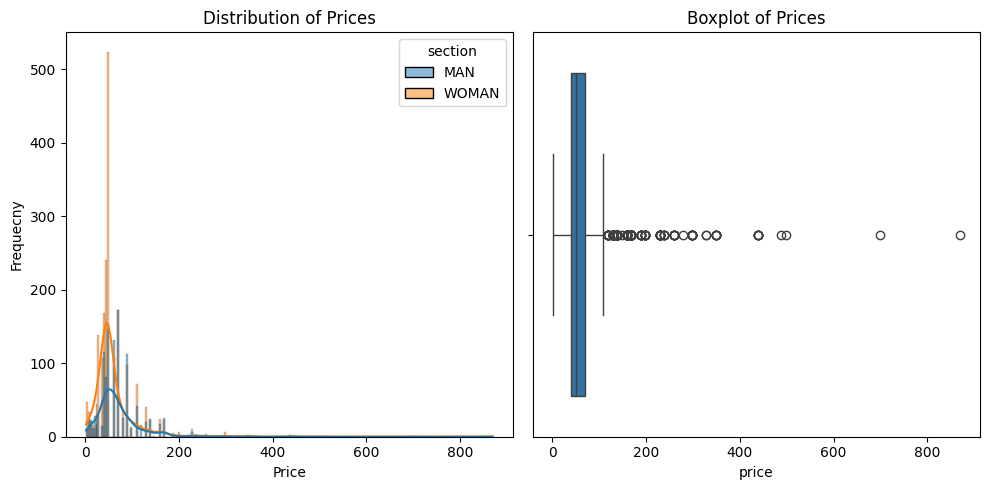

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=df,x='price',ax=ax1,kde=True,hue='section')
ax1.set_title('Distribution of Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Frequecny')

sns.boxplot(data=df,x='price',ax=ax2)
ax2.set_title('Boxplot of Prices')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, "Total Count of Men's and Women's Products")

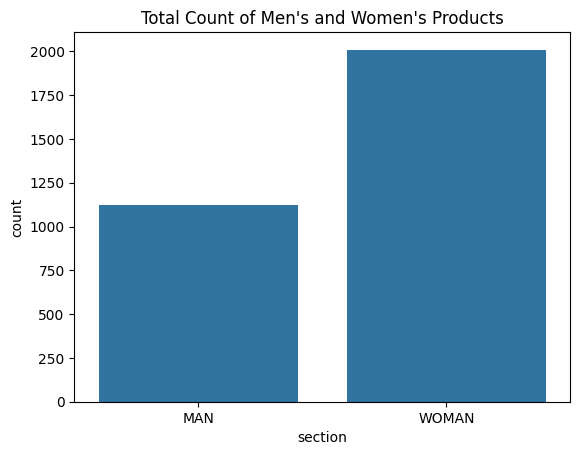

In [96]:
sns.countplot(data=df,x='section')
plt.title("Total Count of Men's and Women's Products")

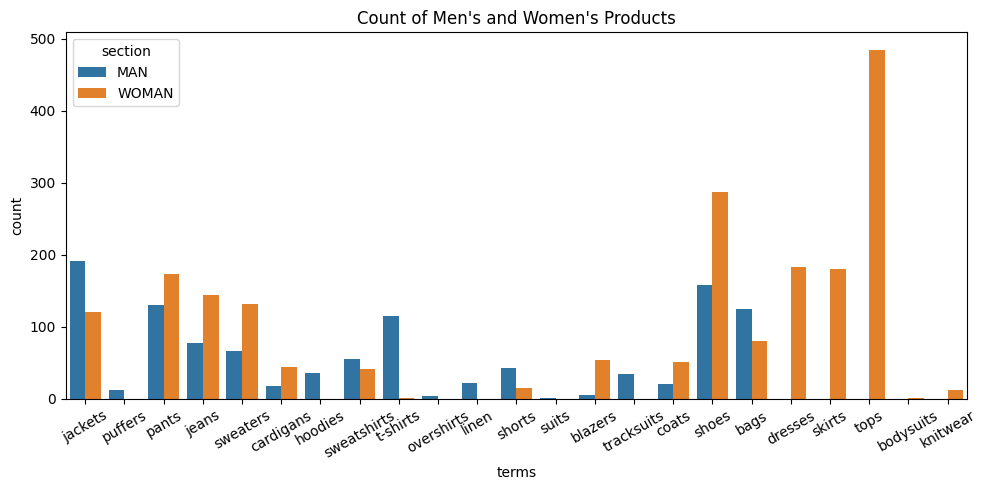

In [95]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x='terms',hue='section')
plt.title("Count of Men's and Women's Products")
plt.xticks(rotation=30)
plt.tight_layout()

In [93]:
# Calculate total revenue
total_revenue = df['price'].sum()

# Calculate average order value (AOV)
total_orders = df['sku'].nunique()  # unique SKUs as orders
average_order_value = total_revenue / total_orders

# Print the metrics
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Order Value (AOV): ${average_order_value:.2f}")

Total Revenue: $200571.34
Average Order Value (AOV): $64.10


**Visualize Images**

In [37]:
root = '/content/drive/MyDrive/MIT 805 Semester Project/zara_images'
fnames = os.listdir(root)

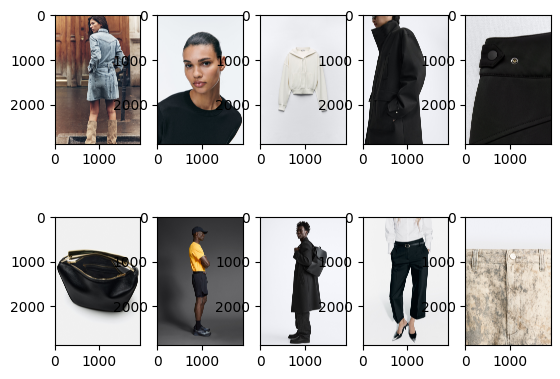

In [38]:
fig, axs = plt.subplots(nrows=2, ncols = 5)
axs = axs.flatten()

for i in range(10):
    filePath = os.path.join(root,fnames[i])
    img = Image.open(filePath)
    axs [i].imshow(img)

plt.show()